## COVID19 Global Forecasting (Week 3)
### Forecast daily COVID-19 spread in regions around world

In [1]:
import pandas as pd

In [2]:
url = 'C:/Users/deepusuresh/Documents/Data Science/3. Week 3'

train = pd.read_csv('train.csv')
train.head()

,Id,Province_State,Country_Region,Date,ConfirmedCases,Fatalities
0,1,NaN,Afghanistan,2020-01-22,0.0,0.0
1,2,NaN,Afghanistan,2020-01-23,0.0,0.0
2,3,NaN,Afghanistan,2020-01-24,0.0,0.0
3,4,NaN,Afghanistan,2020-01-25,0.0,0.0
4,5,NaN,Afghanistan,2020-01-26,0.0,0.0


In [3]:
test = pd.read_csv('test.csv')
test.head()

,ForecastId,Province_State,Country_Region,Date
0,1,NaN,Afghanistan,2020-03-26
1,2,NaN,Afghanistan,2020-03-27
2,3,NaN,Afghanistan,2020-03-28
3,4,NaN,Afghanistan,2020-03-29
4,5,NaN,Afghanistan,2020-03-30


In [4]:
train.shape

(23562, 6)

In [5]:
test.shape

(13158, 4)

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23562 entries, 0 to 23561
Data columns (total 6 columns):
Id                23562 non-null int64
Province_State    10010 non-null object
Country_Region    23562 non-null object
Date              23562 non-null object
ConfirmedCases    23562 non-null float64
Fatalities        23562 non-null float64
dtypes: float64(2), int64(1), object(3)
memory usage: 1.1+ MB


In [14]:
train = train[train["ConfirmedCases"] >= 0]
train.head()

,Id,Province_State,Country_Region,Date,ConfirmedCases,Fatalities
0,1,NaN,Afghanistan,2020-01-22,0.0,0.0
1,2,NaN,Afghanistan,2020-01-23,0.0,0.0
2,3,NaN,Afghanistan,2020-01-24,0.0,0.0
3,4,NaN,Afghanistan,2020-01-25,0.0,0.0
4,5,NaN,Afghanistan,2020-01-26,0.0,0.0


### Missing Data

In [7]:
train.isnull().sum()

Id                    0
Province_State    13552
Country_Region        0
Date                  0
ConfirmedCases        0
Fatalities            0
dtype: int64

In [8]:
test.isnull().sum()

ForecastId           0
Province_State    7568
Country_Region       0
Date                 0
dtype: int64

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

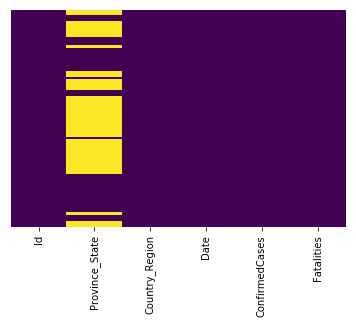

In [10]:
sns.heatmap(train.isnull(),yticklabels=False, cbar=False, cmap='viridis')

[Text(0, 0, 'Afghanistan'),
 Text(0, 0, 'Albania'),
 Text(0, 0, 'Algeria'),
 Text(0, 0, 'Andorra'),
 Text(0, 0, 'Angola'),
 Text(0, 0, 'Antigua and Barbuda'),
 Text(0, 0, 'Argentina'),
 Text(0, 0, 'Armenia'),
 Text(0, 0, 'Australia'),
 Text(0, 0, 'Austria'),
 Text(0, 0, 'Azerbaijan'),
 Text(0, 0, 'Bahamas'),
 Text(0, 0, 'Bahrain'),
 Text(0, 0, 'Bangladesh'),
 Text(0, 0, 'Barbados'),
 Text(0, 0, 'Belarus'),
 Text(0, 0, 'Belgium'),
 Text(0, 0, 'Belize'),
 Text(0, 0, 'Benin'),
 Text(0, 0, 'Bhutan'),
 Text(0, 0, 'Bolivia'),
 Text(0, 0, 'Bosnia and Herzegovina'),
 Text(0, 0, 'Botswana'),
 Text(0, 0, 'Brazil'),
 Text(0, 0, 'Brunei'),
 Text(0, 0, 'Bulgaria'),
 Text(0, 0, 'Burkina Faso'),
 Text(0, 0, 'Burma'),
 Text(0, 0, 'Burundi'),
 Text(0, 0, 'Cabo Verde'),
 Text(0, 0, 'Cambodia'),
 Text(0, 0, 'Cameroon'),
 Text(0, 0, 'Canada'),
 Text(0, 0, 'Central African Republic'),
 Text(0, 0, 'Chad'),
 Text(0, 0, 'Chile'),
 Text(0, 0, 'China'),
 Text(0, 0, 'Colombia'),
 Text(0, 0, 'Congo (Brazzaville)'

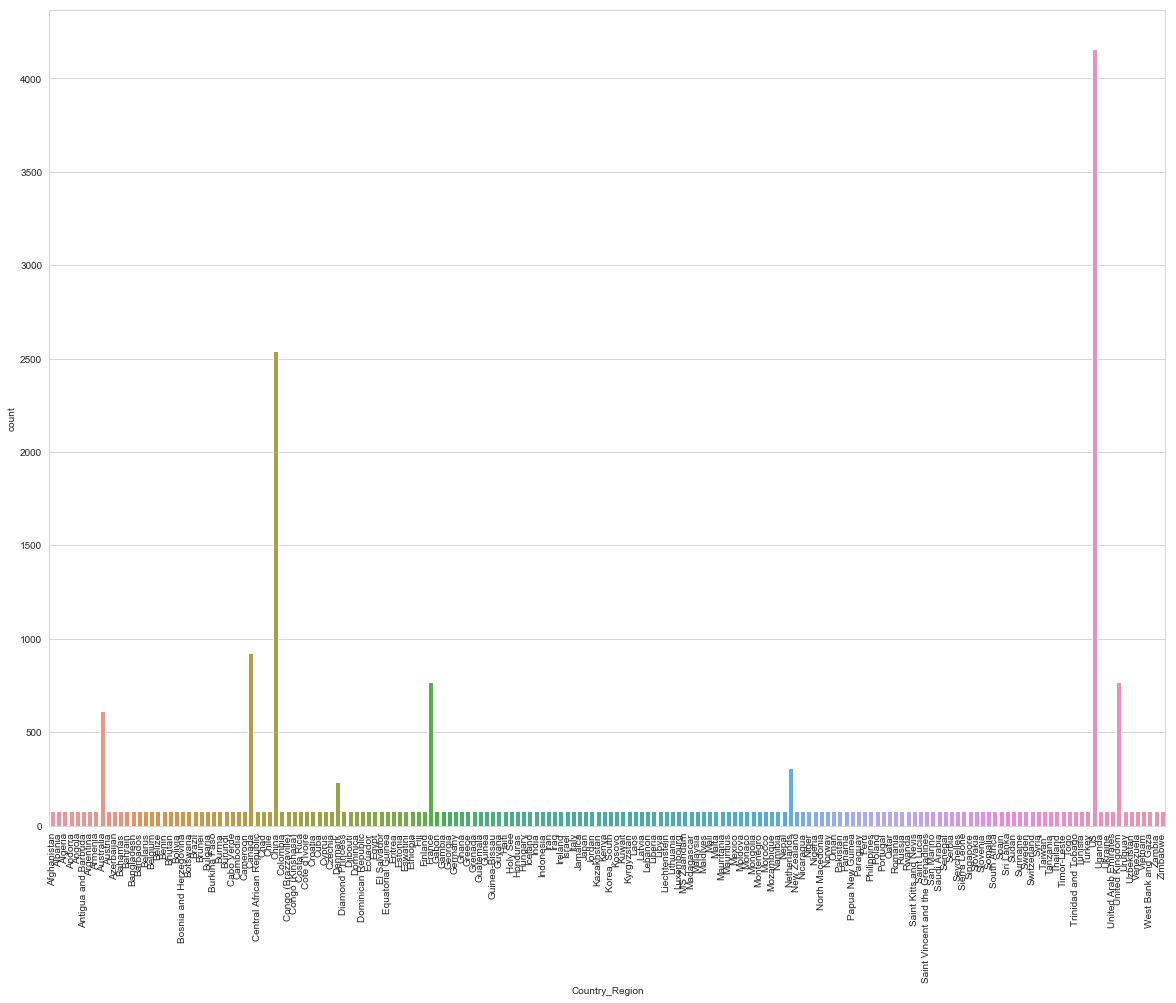

In [11]:
plt.figure(figsize =(20,15))
sns.set_style('whitegrid')
plot = sns.countplot(train['Country_Region'])
plot.set_xticklabels(plot.get_xticklabels(),rotation=90)

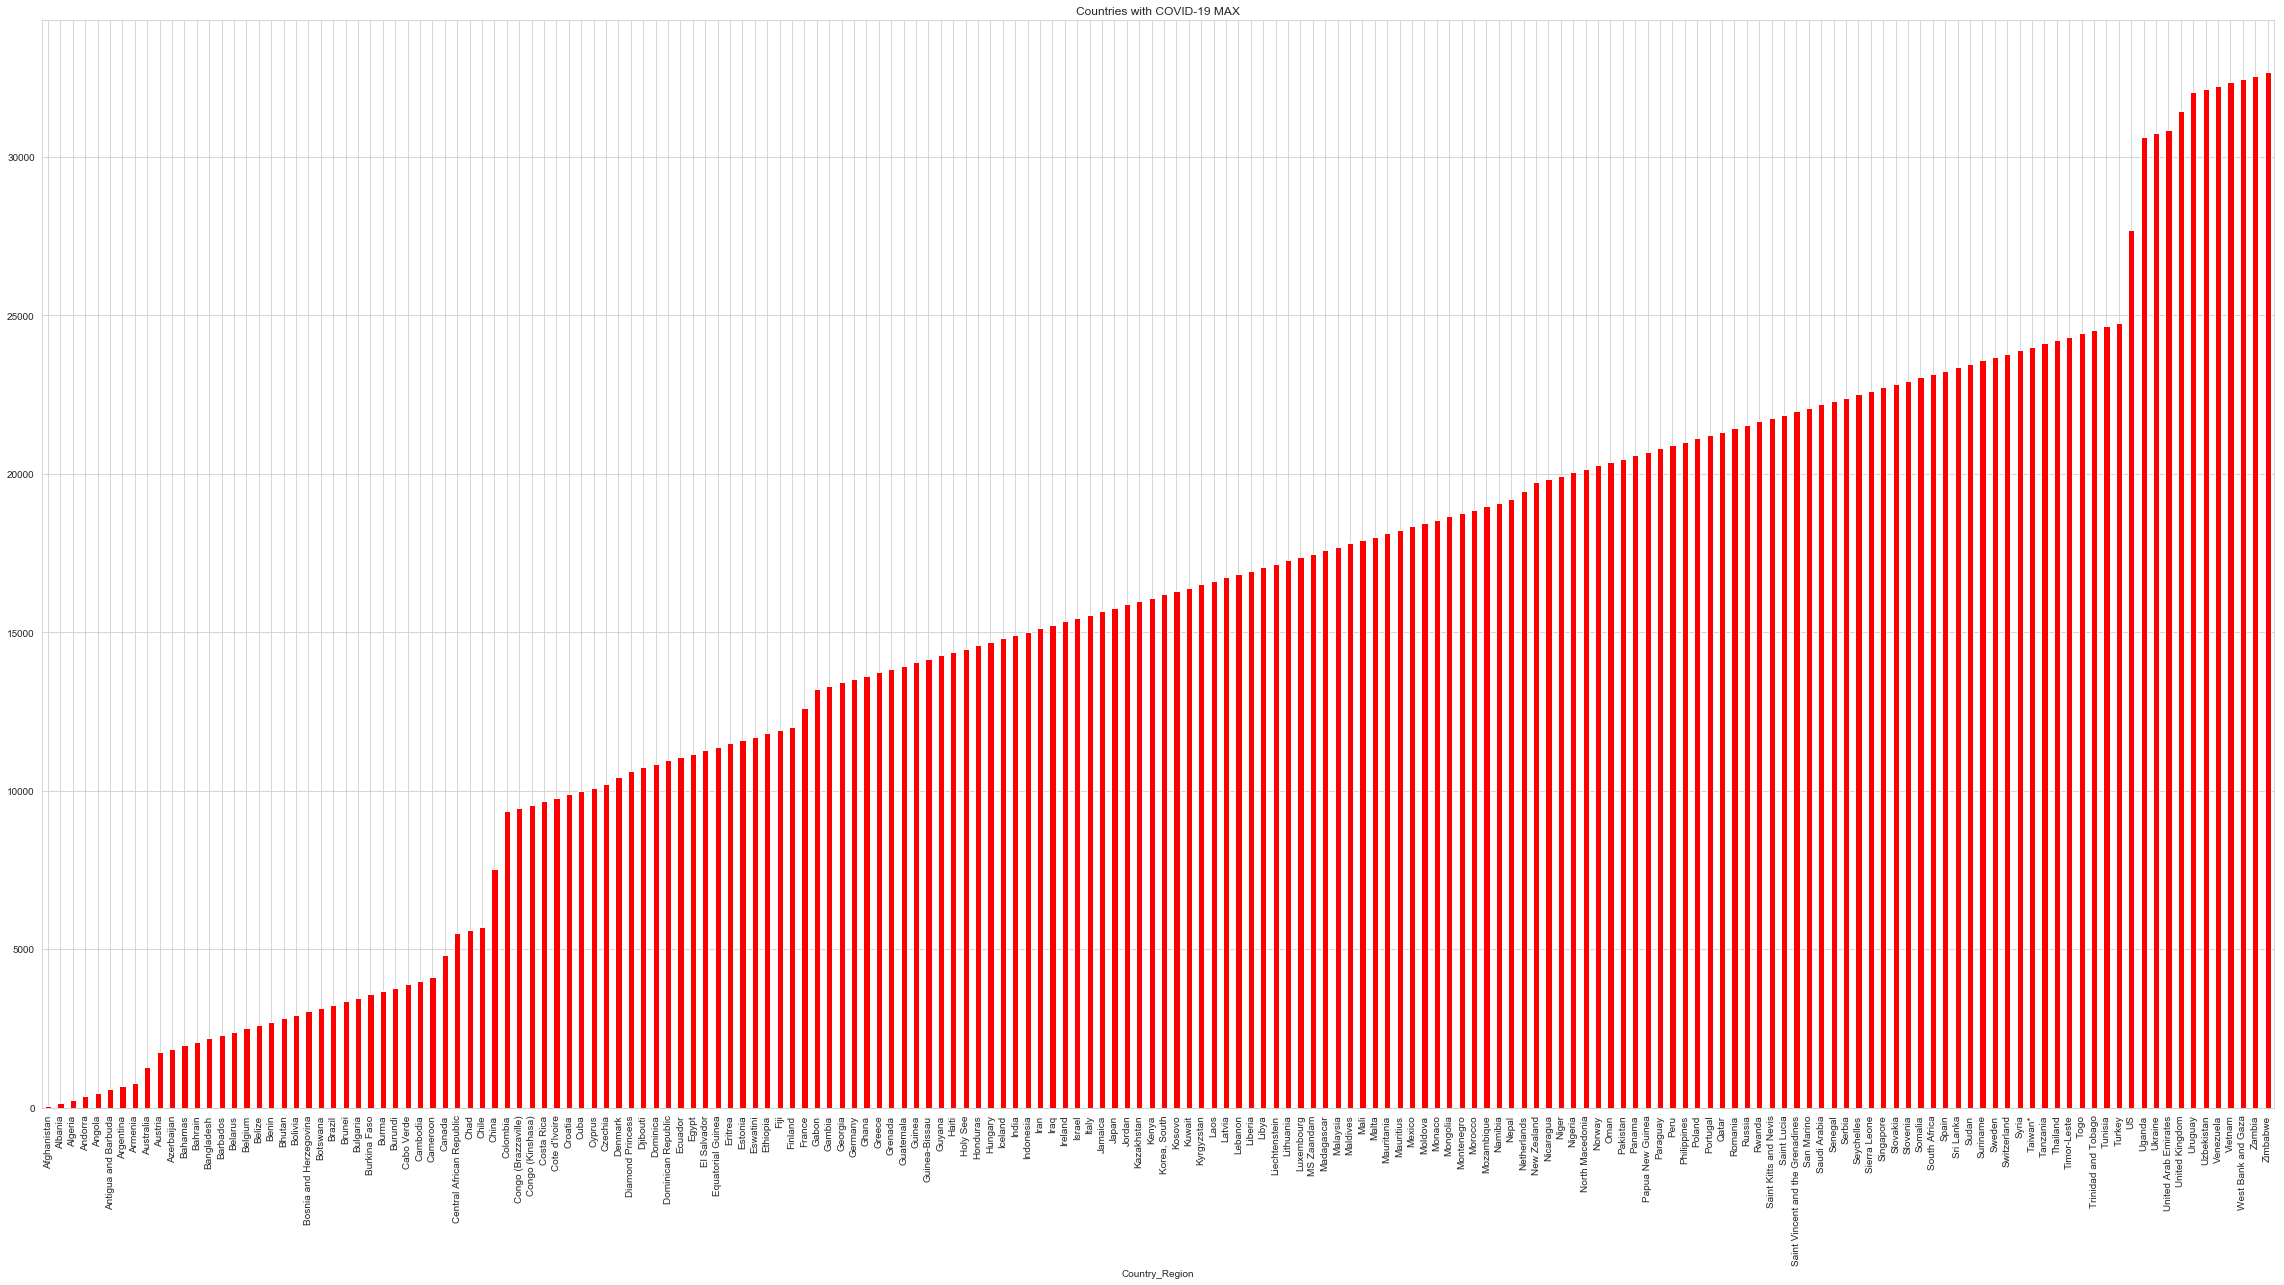

In [13]:
train.groupby('Country_Region')['Id'].mean().plot(kind = 'bar', figsize= (40,20), title= "Countries with COVID-19 MAX", color='red')

In [17]:
EMPTY_VAL = "EMPTY_VAL"

def fillState(state, country):
    if state == EMPTY_VAL: return country
    return state

train['Province_State'].fillna(EMPTY_VAL, inplace=True)
train['Province_State'] = train.loc[:, ['Province_State', 'Country_Region']].apply(lambda x : fillState(x['Province_State'], x['Country_Region']), axis=1)
test['Province_State'].fillna(EMPTY_VAL, inplace=True)
test['Province_State'] = test.loc[:, ['Province_State', 'Country_Region']].apply(lambda x : fillState(x['Province_State'], x['Country_Region']), axis=1)
test.head()

,ForecastId,Province_State,Country_Region,Date
0,1,Afghanistan,Afghanistan,2020-03-26
1,2,Afghanistan,Afghanistan,2020-03-27
2,3,Afghanistan,Afghanistan,2020-03-28
3,4,Afghanistan,Afghanistan,2020-03-29
4,5,Afghanistan,Afghanistan,2020-03-30


In [18]:
unique = pd.DataFrame(train.groupby(['Country_Region', 'Province_State'],as_index=False).count())
unique.head()

,Country_Region,Province_State,Id,Date,ConfirmedCases,Fatalities
0,Afghanistan,Afghanistan,77,77,77,77
1,Albania,Albania,77,77,77,77
2,Algeria,Algeria,77,77,77,77
3,Andorra,Andorra,77,77,77,77
4,Angola,Angola,77,77,77,77


In [23]:
train_groupByCountry = train.loc[:, ['Country_Region', 'Province_State', 'ConfirmedCases', 'Fatalities']].groupby(['Country_Region', 'Province_State']).max().reset_index().groupby('Country_Region').sum().sort_values(by='ConfirmedCases', ascending=False).reset_index()
train_groupByCountry[:15].style.background_gradient(cmap='viridis_r')

,Country_Region,ConfirmedCases,Fatalities
0,US,396063,12719
1,Spain,141942,14045
2,Italy,135586,17127
3,France,110064,10343
4,Germany,107663,2016
5,China,82719,3335
6,Iran,62589,3872
7,United Kingdom,55947,6171
8,Turkey,34109,725
9,Switzerland,22253,821


In [ ]:
import plotly.express as px

countries = df_groupByCountry.Country.unique().tolist()
df_plot = train.loc[(train.Country.isin(countries[:10])) & (df_Train.Date >= '2020-03-01'), ['Date', 'Country', 'State', 'ConfirmedCases', 'Fatalities']].groupby(['Date', 'Country', 'State']).max().reset_index().groupby(['Date', 'Country']).sum().sort_values(by='ConfirmedCases', ascending=False).reset_index()

fig = px.bar(df_plot, x="Date", y="ConfirmedCases", color="Country", barmode="stack")
fig.update_layout(title='Rise of Confirmed Cases around top 10 countries', annotations=[dict(x='2020-03-21', y=150, xref="x", yref="y", text="Coronas Rise exponentially from here", showarrow=True, arrowhead=1, ax=-150, ay=-150)])
fig.show()

In [ ]:
import plotly.express as px

df_plot = df_Train.loc[: , ['Date', 'Country', 'ConfirmedCases', 'Fatalities']].groupby(['Date', 'Country']).max().reset_index()

df_plot.loc[:, 'Date'] = df_plot.Date.dt.strftime("%Y-%m-%d")
df_plot.loc[:, 'Size'] = np.power(df_plot["ConfirmedCases"]+1,0.3)-1 #np.where(df_plot['Country'].isin(['China', 'Italy']), df_plot['ConfirmedCases'], df_plot['ConfirmedCases']*300)

fig = px.scatter_geo(df_plot,
                     locations="Country",
                     locationmode = "country names",
                     hover_name="Country",
                     color="ConfirmedCases",
                     animation_frame="Date", 
                     size='Size',
                     #projection="natural earth",
                     title="Rise of Coronavirus Confirmed Cases")
fig.show()

In [ ]:
import plotly.express as px

countries = df_groupByCountry.Country.unique().tolist()
df_plot = df_Train.loc[df_Train.Country.isin(countries[:10]), ['Date', 'Country', 'ConfirmedCases']].groupby(['Date', 'Country']).max().reset_index()

fig = px.line(df_plot, x="Date", y="ConfirmedCases", color='Country')
fig.update_layout(title='No.of Confirmed Cases per Day for Top 10 Countries',
                   xaxis_title='Date',
                   yaxis_title='No.of Confirmed Cases')
fig.show()

In [ ]:
import plotly.express as px

countries = df_groupByCountry.Country.unique().tolist()
df_plot = df_Train.loc[df_Train.Country.isin(countries[:10]), ['Date', 'Country', 'Fatalities']].groupby(['Date', 'Country']).max().reset_index()

fig = px.scatter(df_plot, x="Date", y="Fatalities", color='Country')
fig.update_layout(title='No.of Fatalities per Day for Top 10 Countries',
                   xaxis_title='Date',
                   yaxis_title='No.of Fatalities')
fig.show()